In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plotGraph
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

In [3]:
# put titantic training data in csv to dataframe
df_titantic_train = pd.read_csv('train.csv')

# put titantic test data in csv to dataframe
df_titantic_test = pd.read_csv('test.csv')

# put titantic survived data in csv to dataframe to calculate accuracy
df_titantic_survived = pd.read_csv('gender_submission.csv')

In [4]:
df_titantic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df_titantic_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
df_titantic_survived

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


Test Data

In [7]:
# converting male/female from string format to numbers for test data
test_df_sex_to_num = []
for i in df_titantic_test['Sex']:
    
    
    if i == 'male':
        test_df_sex_to_num_loop = 0
    
    if i == 'female':
        test_df_sex_to_num_loop = 1
        
    test_df_sex_to_num.append(test_df_sex_to_num_loop) 

    

df_titantic_test['Sex'] =  test_df_sex_to_num   


df_random_forest_test_data = pd.DataFrame()
df_random_forest_test_data['Pclass'] = df_titantic_test['Pclass']
df_random_forest_test_data['Sex'] = df_titantic_test['Sex']
df_random_forest_test_data['Age'] = df_titantic_test['Age']

In [8]:
# change age nan values to average

age_mean  = np.nanmean(df_titantic_test['Age'])

print('age_mean:', age_mean)   
#     
df_random_forest_test_data['Age'] = df_random_forest_test_data['Age'].fillna(age_mean)

age_mean: 30.272590361445783


In [9]:
titantic_X_test = df_random_forest_test_data[['Pclass','Sex','Age']]
titantic_Y_test = df_titantic_survived['Survived']

Training Data

In [10]:
df_titantic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [11]:
# converting male/female from string format to numbers
train_df_sex_to_num = []
for i in df_titantic_train['Sex']:
    
    
    if i == 'male':
         train_df_sex_to_num_loop = 0
    
    if i == 'female':
        train_df_sex_to_num_loop = 1
        
    train_df_sex_to_num.append(train_df_sex_to_num_loop) 

    

df_titantic_train['Sex'] =  train_df_sex_to_num   


df_random_forest_train_data = pd.DataFrame()
df_random_forest_train_data['Pclass'] = df_titantic_train['Pclass']
df_random_forest_train_data['Sex'] = df_titantic_train['Sex']
df_random_forest_train_data['Age'] = df_titantic_train['Age']
df_random_forest_train_data['Survived'] = df_titantic_train['Survived']

In [12]:
# change age nan values to average

age_mean  = np.nanmean(df_titantic_train['Age'])

print('age_mean:', age_mean)   
    
df_random_forest_train_data['Age'] = df_random_forest_train_data['Age'].fillna(age_mean)

age_mean: 29.69911764705882


In [13]:
titantic_X_train = df_random_forest_train_data[['Pclass','Sex','Age']]
titantic_Y_train = df_random_forest_train_data['Survived']

RandomForestClassifier(max_leaf_nodes=2, random_state=0) : -0.20982521847690389
RandomForestClassifier(max_leaf_nodes=12, random_state=0) : -0.20423220973782769
RandomForestClassifier(max_leaf_nodes=22, random_state=0) : -0.1941198501872659
RandomForestClassifier(max_leaf_nodes=32, random_state=0) : -0.1851685393258427
RandomForestClassifier(max_leaf_nodes=42, random_state=0) : -0.18176029962546816
RandomForestClassifier(max_leaf_nodes=52, random_state=0) : -0.17840199750312108
RandomForestClassifier(max_leaf_nodes=62, random_state=0) : -0.18179775280898874
RandomForestClassifier(max_leaf_nodes=72, random_state=0) : -0.18401997503121098
RandomForestClassifier(max_leaf_nodes=82, random_state=0) : -0.18064918851435702
RandomForestClassifier(max_leaf_nodes=92, random_state=0) : -0.18401997503121098
RandomForestClassifier(max_leaf_nodes=102, random_state=0) : -0.18626716604244692
RandomForestClassifier(max_leaf_nodes=112, random_state=0) : -0.18626716604244692
RandomForestClassifier(max_le

Text(0.5, 0, 'Leaves')

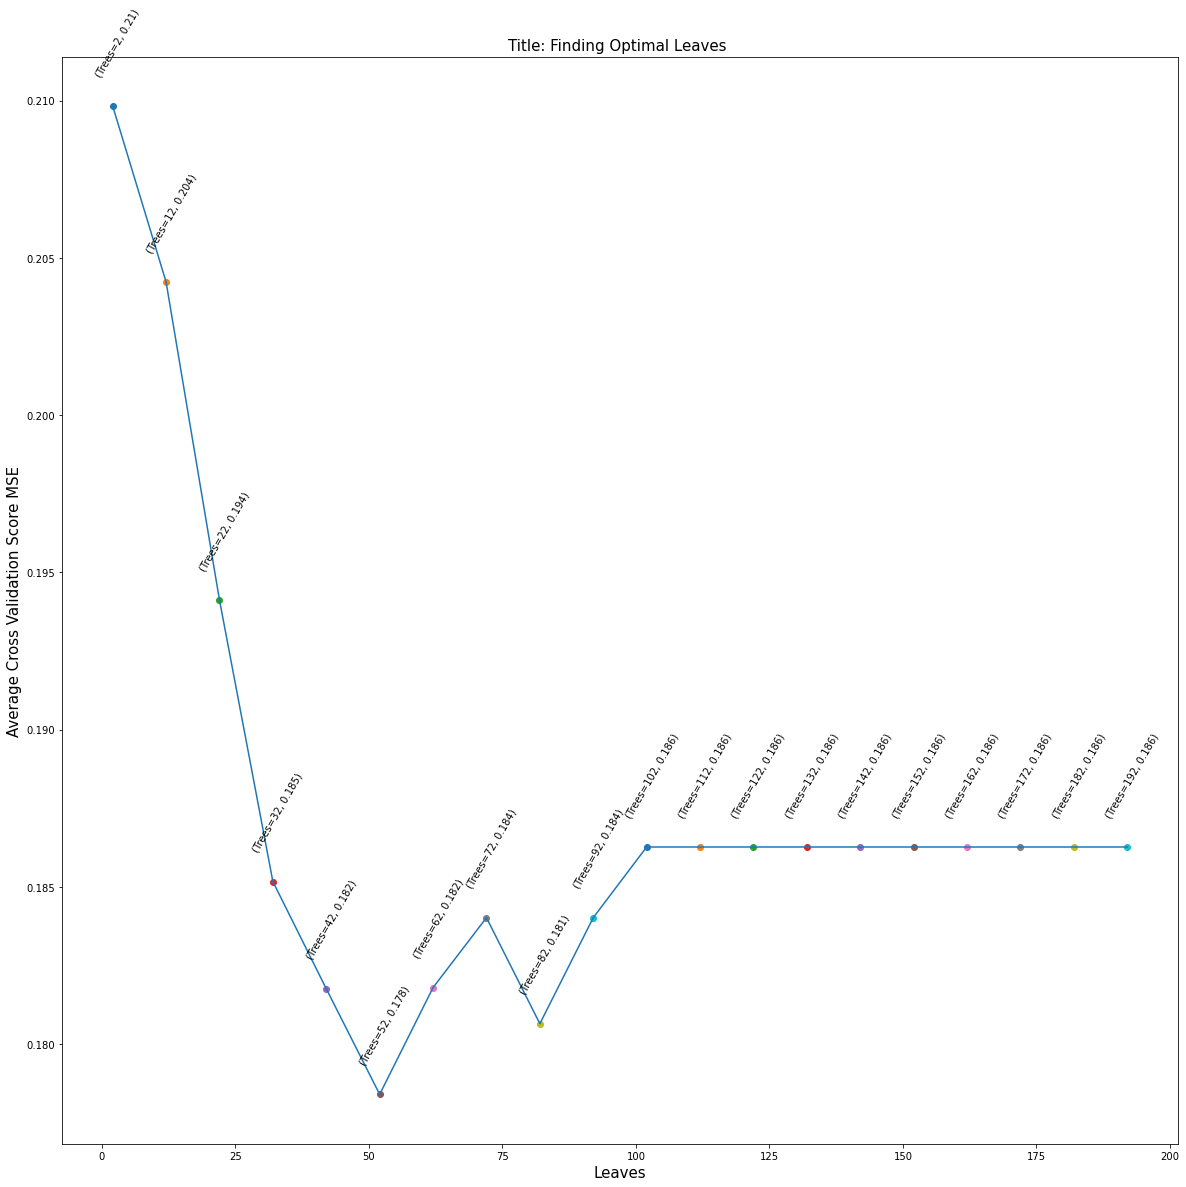

In [14]:
# find optimal number of leaves
figure, axis = plotGraph.subplots(figsize=(20, 20))

scores_array_leaves_mse=[]
i_track_leaves_mse = []
for i in range(2, 200, 10):
    rfC = RandomForestClassifier(max_leaf_nodes = i , random_state=0)
    rfClassifier_fitted = rfC.fit(titantic_X_train, titantic_Y_train)    
    cross_validate_score_leaves = cross_validate(rfC, titantic_X_train, titantic_Y_train, cv=10, scoring='neg_mean_squared_error')
    avg_cvs_score_leaves_mse = np.mean(cross_validate_score_leaves['test_score'])
    print(rfC,':', avg_cvs_score_leaves_mse)
    i_track_leaves_mse.append(i)
    scores_array_leaves_mse.append(avg_cvs_score_leaves_mse)
    axis.scatter(i,np.abs(avg_cvs_score_leaves_mse))
    axis.annotate('(Trees=' +str(i) +', '+ str(round(np.abs(avg_cvs_score_leaves_mse),3)) +')', (i, np.abs(avg_cvs_score_leaves_mse)), textcoords='offset points', xytext=(5,30), ha='center', rotation='60')


axis.plot(i_track_leaves_mse, np.abs(scores_array_leaves_mse))

axis.set_title('Title: Finding Optimal Leaves ', fontsize=15)
axis.set_ylabel('Average Cross Validation Score MSE', fontsize=15)
axis.set_xlabel('Leaves', fontsize=15)

RandomForestClassifier(max_leaf_nodes=52, n_estimators=50, random_state=0) : -0.17951310861423223
RandomForestClassifier(max_leaf_nodes=52, random_state=0) : -0.17840199750312108
RandomForestClassifier(max_leaf_nodes=52, n_estimators=150, random_state=0) : -0.1750561797752809
RandomForestClassifier(max_leaf_nodes=52, n_estimators=200, random_state=0) : -0.17840199750312108
RandomForestClassifier(max_leaf_nodes=52, n_estimators=250, random_state=0) : -0.17840199750312108
RandomForestClassifier(max_leaf_nodes=52, n_estimators=300, random_state=0) : -0.17840199750312108
RandomForestClassifier(max_leaf_nodes=52, n_estimators=350, random_state=0) : -0.17952559300873908
RandomForestClassifier(max_leaf_nodes=52, n_estimators=400, random_state=0) : -0.17840199750312108
RandomForestClassifier(max_leaf_nodes=52, n_estimators=450, random_state=0) : -0.1772784019975031
RandomForestClassifier(max_leaf_nodes=52, n_estimators=500, random_state=0) : -0.17615480649188514
RandomForestClassifier(max_leaf

Text(0.5, 0, 'Trees')

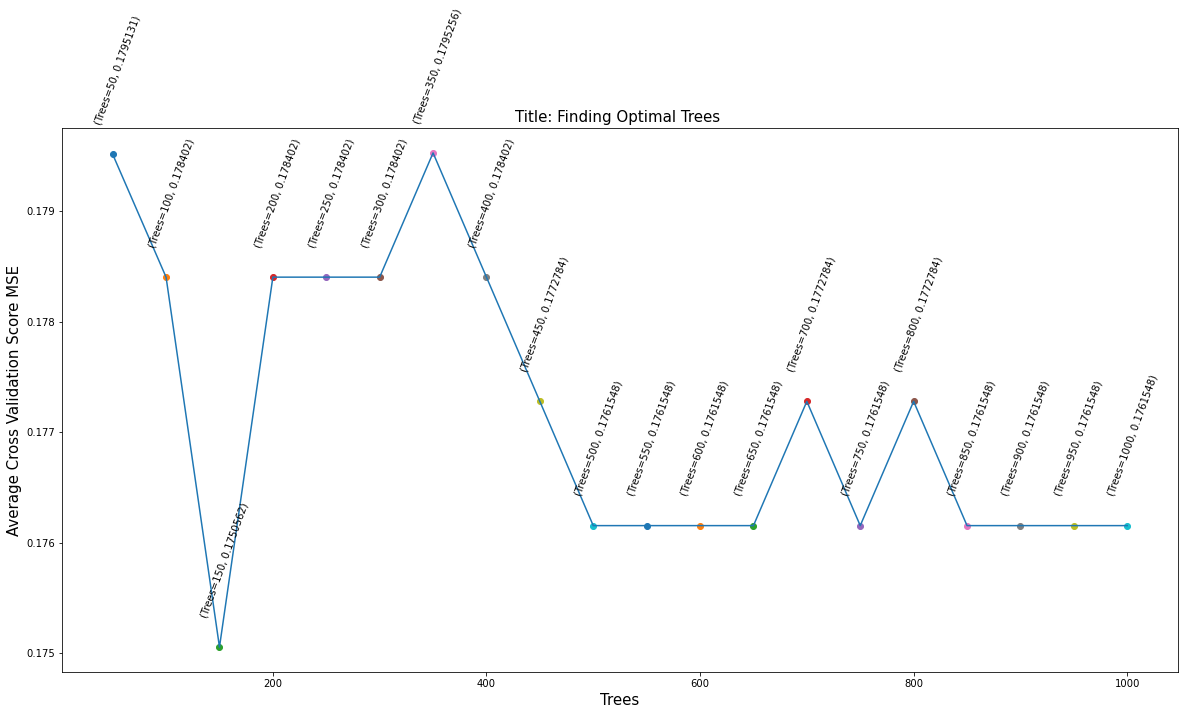

In [15]:
# find optimal number of trees
from sklearn.model_selection import cross_validate

figure, axis2 = plotGraph.subplots(figsize=(20, 10))

scores_array_trees_mse=[]
i_track_trees_mse = []
for i in range(50, 1050, 50):
    rfC = RandomForestClassifier(n_estimators = i , random_state=0, max_leaf_nodes = 52)
    rfClassifier_fitted = rfC.fit(titantic_X_train, titantic_Y_train)    
    cross_validate_trees_score = cross_validate(rfC, titantic_X_train, titantic_Y_train, cv=10, scoring='neg_mean_squared_error')
    avg_cvs_score_trees_mse = np.mean(cross_validate_trees_score['test_score'])
    print(rfC,':', avg_cvs_score_trees_mse)
    i_track_trees_mse.append(i)
    scores_array_trees_mse.append(avg_cvs_score_trees_mse)
    axis2.scatter(i,np.abs(avg_cvs_score_trees_mse))
    axis2.annotate('(Trees=' +str(i) +', '+ str(round(np.abs(avg_cvs_score_trees_mse),7)) +')', (i, np.abs(avg_cvs_score_trees_mse)), textcoords='offset points', xytext=(5,30), ha='center', rotation='70')


axis2.plot(i_track_trees_mse, np.abs(scores_array_trees_mse))

axis2.set_title('Title: Finding Optimal Trees ', fontsize=15)
axis2.set_ylabel('Average Cross Validation Score MSE', fontsize=15)
axis2.set_xlabel('Trees', fontsize=15)

In [16]:
rfC_optimal_training = RandomForestClassifier(n_estimators = 150, max_leaf_nodes=52)
rfClassifierOptimal_fitted_trained = rfC_optimal_training.fit(titantic_X_train, titantic_Y_train)  

In [17]:
rfClassifierPrediction_trained = rfClassifierOptimal_fitted_trained.predict(titantic_X_train)

In [18]:
# calculate MSE of trained data
from sklearn.metrics import mean_squared_error


titanicRFMSE_trained = mean_squared_error(titantic_Y_train,rfClassifierPrediction_trained)

In [19]:
titanicRFMSE_trained

0.13019079685746351

In [21]:
rfC_optimal_testing = RandomForestClassifier(n_estimators = 150, max_leaf_nodes=52)
rfClassifierOptimal_fitted_test = rfC_optimal_testing.fit(titantic_X_test, titantic_Y_test) 

In [22]:
rfClassifierPrediction_test = rfClassifierOptimal_fitted_test.predict(titantic_X_test)

In [23]:
# calculate MSE of test data
titanicRFMSE_test = mean_squared_error(titantic_Y_test,rfClassifierPrediction_test)
titanicRFMSE_test

0.0

In [24]:
rfClassifierPrediction_test

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [25]:
df_kaggle_submission = pd.DataFrame()
df_kaggle_submission['PassengerId'] = df_titantic_survived['PassengerId']
df_kaggle_submission['Survived'] = rfClassifierPrediction_test
df_kaggle_submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [30]:
# score on kaggle as .7655
df_kaggle_submission.to_csv('gender_submission_kaggle_submission_rf_classifier.csv', index=False)